In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Python #1

Add functionality to loaddata.py that loads the data from files in the `data\metacritic` folder similarly to how the code we wrote for boxofficemojo works. Try to reuse as much code from the morning as you can, without copy-pasting it!

In [2]:
#!cp ../project_1/loaddata.py ./loaddata.py

In [3]:
import loaddata

META_DIR = "../project_1/data/metacritic"
loaddata.MOJO_DIR = META_DIR

In [4]:
meta_movies = loaddata.get_boxofficemojo_movies()

Parsed 4767 movies from 4767 files


### Python #2

BoxofficeMojo data has a couple fields `release_date_limited` and `release_date_wide` that are strings in a "YYYY-MM-DD" format. Python has a library called `datetime` for doing useful things with dates. Write a function using the `datetime` library to convert these strings into `datetime.date` objects.

In [5]:
clean_movies = [m for m in meta_movies if type(m) == dict]

In [6]:
df = pd.DataFrame(clean_movies)
df.head()

,complete,director,genre,metacritic_page,metascore,num_critic_reviews,num_user_ratings,num_user_reviews,rating,release_date,runtime_minutes,studio,title,unable to retrieve,user_score,year
0,True,Gil Junger,"[Comedy, Romance]",/movie/10-things-i-hate-about-you,70.0,"[18, 7, 1, 26]",175.0,"[27, 1, 1, 29]",PG-13,1999-03-31,97.0,Buena Vista Pictures,10 Things I Hate About You,NaN,7,1999
1,True,Jamie Linden,"[Drama, Comedy, Romance]",/movie/10-years,61.0,"[7, 11, 0, 18]",12.0,"[3, 2, 1, 6]",R,2012-09-14,100.0,Anchor Bay Entertainment,10 Years,NaN,6.6,2012
2,True,Roland Emmerich,"[Adventure, Drama, Fantasy]",/movie/10000-bc,34.0,"[4, 8, 17, 29]",273.0,"[50, 18, 60, 128]",PG-13,2008-03-07,109.0,Warner Bros. Pictures,"10,000 BC",NaN,4.6,2008
3,True,Stephen Herek,"[Adventure, Comedy, Family]",/movie/101-dalmatians,49.0,"[8, 9, 3, 20]",78.0,"[5, 5, 0, 10]",G,1996-11-27,103.0,Buena Vista Pictures,101 Dalmatians,NaN,5.9,1996
4,True,Kevin Lima,"[Comedy, Family]",/movie/102-dalmatians,35.0,"[7, 5, 12, 24]",47.0,"[7, 3, 3, 13]",G,2000-11-22,100.0,Buena Vista Pictures,102 Dalmatians,NaN,5.3,2000


In [7]:
df.drop('unable to retrieve', axis=1, inplace=True)

In [8]:
#df.head()
df.dropna(inplace=True);

In [9]:
#df['release_date'] = pd.to_datetime(df['release_date'])
df.head()['release_date']

0    1999-03-31
1    2012-09-14
2    2008-03-07
3    1996-11-27
4    2000-11-22
Name: release_date, dtype: object

In [10]:
def mydatetime(ser):
    import datetime as dt
    return pd.Series([dt.datetime.strptime(d, "%Y-%m-%d") for d in ser])
df['release_date'] = mydatetime(df['release_date'])

### Pandas #3

Write a function that loads both sources and merges them together, returning as many movies as possible where data is available from both sources.

In [11]:
def get_movies(aDir):
    import os, json
    file_contents = os.listdir(aDir)

    movie_list = []

    for filename in file_contents:
        filepath = os.path.join(aDir, filename)

        with open(filepath, 'r') as movie_file:
            movie_data = json.load(movie_file)
        if hasattr(movie_data, "keys"): # type(movie_data) == dict:
            movie_list.append(movie_data)
    return movie_list

In [12]:
def load_movies():
    mojo_movies = get_movies("../project_1/data/boxofficemojo")    
    meta_movies = get_movies("../project_1/data/metacritic")
    
    mojo_df = pd.DataFrame(mojo_movies)
    meta_df = pd.DataFrame(meta_movies)
    
    merged = pd.merge(mojo_df, meta_df, on="title")
    
    return merged

movie_df = load_movies()

In [13]:
movie_df.head()

,alt_title,director_x,domestic_gross,mojo_slug,opening_per_theater,opening_weekend_take,production_budget,release_date_limited,release_date_wide,title,...,num_critic_reviews,num_user_ratings,num_user_reviews,rating,release_date,runtime_minutes,studio,unable to retrieve,user_score,year_y
0,10 Things I Hate About You (1999),None,38178166.0,10thingsihateaboutyou,3668.0,8330681.0,30000000.0,None,1999-03-31,10 Things I Hate About You,...,"[18, 7, 1, 26]",175.0,"[27, 1, 1, 29]",PG-13,1999-03-31,97.0,Buena Vista Pictures,NaN,7,1999
1,10 Years (2012),Jamie Linden,203373.0,10years,7569.0,22707.0,NaN,None,2012-09-14,10 Years,...,"[7, 11, 0, 18]",12.0,"[3, 2, 1, 6]",R,2012-09-14,100.0,Anchor Bay Entertainment,NaN,6.6,2012
2,The 11th Hour (2007),None,707343.0,11thhour,15213.0,60853.0,NaN,None,2007-08-17,The 11th Hour,...,"[20, 9, 1, 30]",18.0,"[6, 1, 5, 12]",PG,2007-08-17,95.0,Warner Independent Pictures (WIP),NaN,6.5,2007
3,127 Hours (2010),Danny Boyle,18335230.0,127hours,2333.0,2136801.0,18000000.0,2010-11-05,2011-01-28,127 Hours,...,"[37, 1, 0, 38]",518.0,"[100, 2, 16, 118]",R,2010-11-05,94.0,Fox Searchlight Pictures,NaN,8,2010
4,12 Rounds (2009),Renny Harlin,12234694.0,12rounds,2286.0,5329240.0,NaN,None,2009-03-27,12 Rounds,...,"[1, 5, 7, 13]",66.0,"[3, 5, 12, 20]",PG-13,2009-03-27,108.0,Fox Atomic,NaN,5,2009


In [14]:
len(movie_df)

2434

### Modelling #1

Draw a histogram of the residuals for one of the regression models. What do their distribution look like? Does it look normally distributed?

In [15]:
mojo_movies = get_movies("../project_1/data/boxofficemojo")
mojo_df = pd.DataFrame(mojo_movies)

In [16]:
# view-ish-ness and warnings .... 
#test_df = mojo_df[['domestic_gross']]
#test_df[0,0] = -99.0
#print mojo_df['domestic_gross'][0]

In [17]:
# I like inplace ops, but without a copy, 
# this yells about view semantics (which should be a false postiive here)
#df = mojo_df[['domestic_gross', 'opening_weekend_take']].copy()
#df.dropna(inplace=True)

df = mojo_df[['domestic_gross', 'opening_weekend_take']]
print len(df)
df = df.dropna() # also, inplace=True ... but yells about view semantics
print len(df)

3728
3548


In [18]:
import statsmodels.api as sm

Y = df.domestic_gross
X = sm.add_constant(df.opening_weekend_take)

results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     9522.
Date:                Wed, 06 Apr 2016   Prob (F-statistic):               0.00
Time:                        10:10:56   Log-Likelihood:                -66088.
No. Observations:                3548   AIC:                         1.322e+05
Df Residuals:                    3546   BIC:                         1.322e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                 5.397e+06   5.92e+05      9.120      0.000      4.24e+06  6.56e+06
opening_weekend_take     3.4734      0.036     97.581      0.000         3.404     3.543
==============================================================================
Omnibus:                     4177.673   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           873313.507
Skew:                           5.909   Prob(JB):                         0.00
Kurtosis:                      78.946   Cond. No.                     1.97e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/mfenner/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


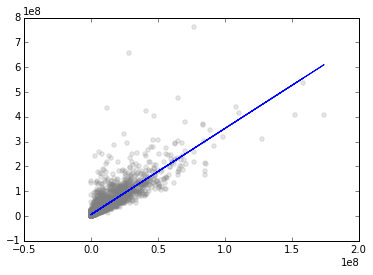

In [19]:
predicted_gross = results.predict()
plt.scatter(df.opening_weekend_take, df.domestic_gross, color='gray', alpha=.2)
plt.plot(df.opening_weekend_take, predicted_gross, color='blue')

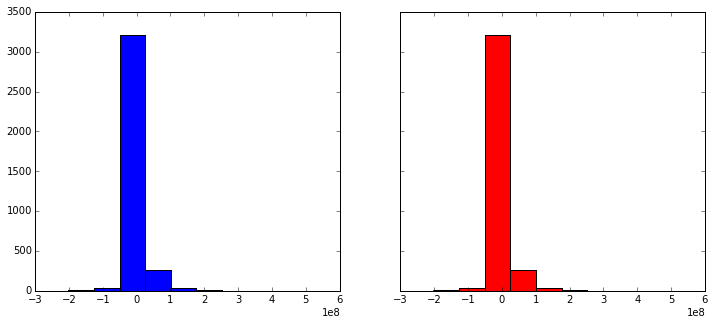

In [20]:
_, (ax1, ax2) = plt.subplots(1,2,sharey=True, figsize=(12,5))
ax1.hist(results.resid)
manual_resid = df.domestic_gross - predicted_gross
ax2.hist(manual_resid, color='red');

In [21]:
df['log_dg'] = np.log(df.domestic_gross)
df['log_owt'] = np.log(df.opening_weekend_take)

In [22]:
Y = df.log_dg
X = sm.add_constant(df.log_owt)

linmodel_logs_results = sm.OLS(Y,X).fit()
logpred = linmodel_logs_results.predict()

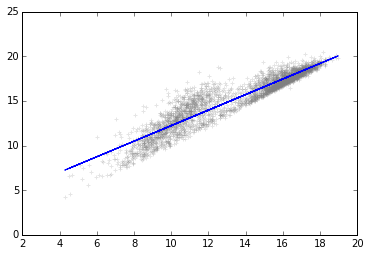

In [23]:
plt.scatter(df.log_owt, df.log_dg, color='gray', marker='+', alpha=.2)
#plt.scatter(df.log_owt, df.log_dg, 'go', alpha=.2)
plt.plot(df.log_owt, logpred, color='blue')

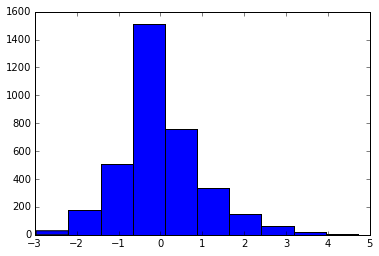

In [24]:
plt.hist(linmodel_logs_results.resid);

### Modelling #2

Build a Domestic Gross model using all the features. Include every available feature. How does your model do? Is it safe to include all these features?

In [25]:
mojo_movies = get_movies("../project_1/data/boxofficemojo")
mojo_df = pd.DataFrame(mojo_movies)

mojo_df = mojo_df.dropna() # axis=0, how=any

In [26]:
mojo_df.columns

Index([u'alt_title', u'director', u'domestic_gross', u'mojo_slug',
       u'opening_per_theater', u'opening_weekend_take', u'production_budget',
       u'release_date_limited', u'release_date_wide', u'title',
       u'widest_release', u'worldwide_gross', u'year'],
      dtype='object')

In [27]:
import statsmodels.formula.api as smf

target_var = "domestic_gross"
all_other_vars = "+".join(v for v in mojo_df.columns if v != target_var)
formula = (target_var + " ~ " + all_other_vars).encode('ascii')

#smf.ols("domestic_gross ~ production_budget", data=mojo_df)
saturated_model_results = smf.ols(formula, data=mojo_df).fit()

# saturated_model_results.summary()

In [28]:
# which columns have "unique" indicators
print [d for d in mojo_df.columns if len(pd.unique(mojo_df[d])) > .9 * len(mojo_df)]

[u'alt_title', u'domestic_gross', u'mojo_slug', u'opening_per_theater', u'opening_weekend_take', u'release_date_limited', u'release_date_wide', u'title', u'widest_release', u'worldwide_gross']


In [29]:
selected_features = [#'director', 
                     "opening_per_theater", 
                     "opening_weekend_take", 
                     "production_budget", 
                     'widest_release',
                     'worldwide_gross']

target_var = "domestic_gross"
formula = "%s ~ %s" % (target_var, "+".join(selected_features))
model_results = smf.ols(formula, data=mojo_df).fit()

In [30]:
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     379.5
Date:                Wed, 06 Apr 2016   Prob (F-statistic):           9.55e-72
Time:                        10:10:58   Log-Likelihood:                -2266.4
No. Observations:                 126   AIC:                             4545.
Df Residuals:                     120   BIC:                             4562.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept            -1.822e+06   4.14e+06     -0.441      0.660        -1e+07  6.37e+06
opening_per_theater   1617.0742    639.379      2.529      0.013       351.148  2883.001
opening_weekend_take     1.2413      0.243      5.102      0.000         0.760     1.723
production_budget       -0.1780      0.071     -2.512      0.013        -0.318    -0.038
widest_release        1566.6944   2809.767      0.558      0.578     -3996.448  7129.837
worldwide_gross          0.3587      0.015     24.074      0.000         0.329     0.388
==============================================================================
Omnibus:                       26.376   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.215
Skew:                           0.725   Prob(JB):                     2.82e-17
Kurtosis:                       6.523   Cond. No.                     5.45e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.45e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Modeling #3

Create a couple of features yourself. Add them as columns in your dataframe. Calculate them from other features. Examples: a) Length of title, b) if it is after 2000 or not (1 if it is, 0 it isn't), number of thaters opened to (opening take/opening per theater), etc. You make others. Put them (among with budget and other features of your choice) in model. See if they look significant. One by one, remove insignificant features and check the residuals. Any change? What is left? (Try different combinations to find a better performing model. Which metric will you use for 'better performance'?)

In [31]:
mojo_movies = get_movies("../project_1/data/boxofficemojo")
mojo_df = pd.DataFrame(mojo_movies)
mojo_df = mojo_df.dropna() # axis=0, how=any

In [32]:
mojo_df['recent'] = mojo_df['year'] > 2000
mojo_df['open_theaters'] = mojo_df['opening_weekend_take'] / mojo_df['opening_per_theater']
mojo_df['investment'] = np.log(mojo_df['production_budget']) * np.log(mojo_df['widest_release'])

In [33]:
selected_features = ["production_budget", 
                     'widest_release',
                     #'worldwide_gross',
                     'recent',
                     'opening_weekend_take',
                     'open_theaters',
                     #'investment'
                    ]

target_var = "domestic_gross"
formula = "%s ~ %s" % (target_var, "+".join(selected_features))
model_results = smf.ols(formula, data=mojo_df).fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     57.25
Date:                Wed, 06 Apr 2016   Prob (F-statistic):           3.60e-30
Time:                        10:10:58   Log-Likelihood:                -2367.4
No. Observations:                 126   AIC:                             4747.
Df Residuals:                     120   BIC:                             4764.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept             4.039e+07   1.01e+07      3.992      0.000      2.04e+07  6.04e+07
recent[T.True]       -2.694e+07   7.93e+06     -3.398      0.001     -4.26e+07 -1.12e+07
production_budget       -0.0220      0.164     -0.134      0.894        -0.348     0.304
widest_release        4.077e+04   6865.180      5.938      0.000      2.72e+04  5.44e+04
opening_weekend_take     4.6248      0.448     10.322      0.000         3.738     5.512
open_theaters         -4.86e+04   8319.622     -5.842      0.000     -6.51e+04 -3.21e+04
==============================================================================
Omnibus:                      117.133   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1671.662
Skew:                           3.163   Prob(JB):                         0.00
Kurtosis:                      19.685   Cond. No.                     1.41e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# to really get into this, we need to do some logs on the dollar values
# ignore worldwide take since it's really another *output* variable (with high corr)
# digging into directors would help (we do that later)

### Modeling #4

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [35]:
mojo_movies = get_movies("../project_1/data/boxofficemojo")
mojo_df = pd.DataFrame(mojo_movies)

mojo_df = mojo_df[["opening_weekend_take", "domestic_gross"]]

mojo_df = mojo_df.dropna() # axis=0, how=any
print len(mojo_df)

3548


In [36]:
num_examples = len(mojo_df)
num_train_examples = int(num_examples * .75)
print num_examples

shuffled_indices = np.random.permutation(num_examples)

train_idxs = shuffled_indices[:num_train_examples]
test_idxs = shuffled_indices[num_train_examples:]

train_df = mojo_df.iloc[train_idxs]
test_df  = mojo_df.iloc[test_idxs]

print len(train_df), len(test_df)

3548
2661 887


In [37]:
Y = train_df.domestic_gross
X = sm.add_constant(train_df.opening_weekend_take)

model = sm.OLS(Y,X)
results = model.fit()
preds = results.predict() # train set

test_preds = results.predict(test_df)

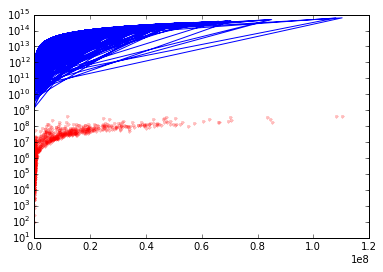

In [38]:
_, ax = plt.subplots()
plt.plot(test_df['opening_weekend_take'], test_df['domestic_gross'], 'r.', alpha=.25)
plt.plot(test_df['opening_weekend_take'], test_preds, 'b-')
ax.set_yscale('log')

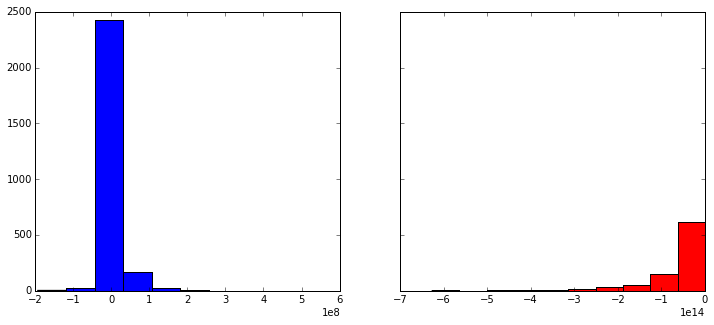

In [39]:
_, (ax1, ax2) = plt.subplots(1,2,sharey=True, figsize=(12,5))
ax1.hist(results.resid.values)

manual_resid = test_df.domestic_gross.values - test_preds
ax2.hist(manual_resid, color='red');

### Modelling #5

Build a model for predicting gross with multiple features, including budget. Plot a scatterplot with x=budget, y=gross, both for actual values and for predicted values. Predicted values will no longer neatly fall on a line. Why? What's happening?

In [40]:
mojo_movies = get_movies("../project_1/data/boxofficemojo")
mojo_df = pd.DataFrame(mojo_movies)

mojo_df = mojo_df[["production_budget", "opening_weekend_take", "domestic_gross"]]

mojo_df = mojo_df.dropna() # axis=0, how=any
print len(mojo_df)

1574


In [41]:
mojo_df.columns

Index([u'production_budget', u'opening_weekend_take', u'domestic_gross'], dtype='object')

In [42]:
num_examples = len(mojo_df)
shuffled_indices = np.random.permutation(num_examples)

num_train_examples = int(num_examples * .75)
print num_train_examples

train_df = mojo_df.iloc[shuffled_indices[:num_train_examples]]
test_df  = mojo_df.iloc[shuffled_indices[num_train_examples:]]

1180


In [43]:
print len(test_df) + len(train_df)

1574


In [44]:
Y = train_df.domestic_gross
X = sm.add_constant(train_df[["production_budget", "opening_weekend_take"]])

In [45]:
X[:5]

,const,production_budget,opening_weekend_take
293,1,60000000.0,38291056.0
2090,1,30000000.0,908446.0
1553,1,20000000.0,16300155.0
27,1,43000000.0,10310672.0
338,1,49000000.0,15129385.0


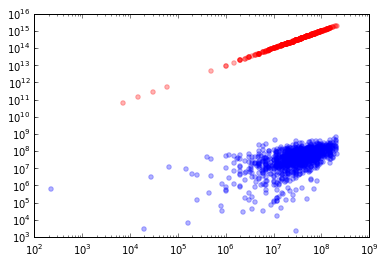

In [46]:
results = sm.OLS(Y, X).fit()
test_preds = results.predict(test_df)

# print results.summary()

plt.scatter(train_df.production_budget, train_df.domestic_gross, color='b', alpha=.3)
plt.scatter(test_df.production_budget.values, test_preds, color='r', alpha=.3)
plt.xscale('log')
plt.yscale('log')
#plt.xlim(1e4, 1e9)
#plt.ylim(1e4, 1e9)

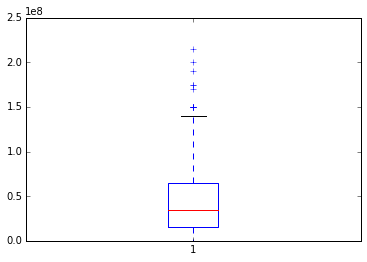

In [47]:
plt.boxplot(test_df.production_budget.values);

In [48]:
# it will jitter with a 3rd dimension (hence, not a line if you do it "right")
# see below, for example

### Data Viz. #1

Fit three different regression models to your data (different feature sets). Plot all of them together on top of the real data. Add a legend so we can see which model is which.

In [49]:
mojo_movies = get_movies("../project_1/data/boxofficemojo")
mojo_df = pd.DataFrame(mojo_movies)

selected_features = [#'director', 
                     "opening_per_theater", 
                     "opening_weekend_take", 
                     "production_budget", 
                     'widest_release',
                     'worldwide_gross',
                     'domestic_gross']

mojo_df = mojo_df[selected_features]


mojo_df = mojo_df.dropna() # axis=0, how=any
print len(mojo_df)

1462


In [50]:
def makemodel(df ,target, features):
    formula = "%s ~ %s" % (target_var, "+".join(features))
    model_results = smf.ols(formula.encode('ascii'), data=df).fit()    
    return model_results

m1 = makemodel(mojo_df, 'domestic_gross', ['production_budget', 'widest_release'])
m2 = makemodel(mojo_df, 'domestic_gross', ['opening_weekend_take', 'opening_per_theater'])
m3 = makemodel(mojo_df, 'domestic_gross', ['production_budget', 'opening_weekend_take'])

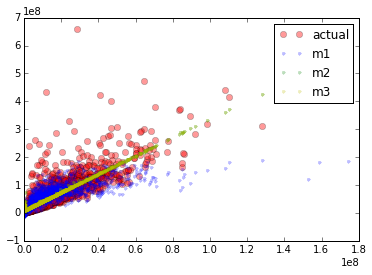

In [51]:
plt.plot(mojo_df.opening_weekend_take, mojo_df.domestic_gross, 'ro', alpha=.4, label='actual')

plt.plot(mojo_df.opening_weekend_take, m1.predict(), 'b.', alpha=.25, label="m1")
plt.plot(mojo_df.opening_weekend_take, m2.predict(), 'g.', alpha=.25, label="m2")
plt.plot(mojo_df.opening_weekend_take, m2.predict(), 'y.', alpha=.25, label="m3")

plt.legend();

### Viz #2

For a model that predicts either gross or opening weekend with the budget as the single feature, plot all the movies as points, plot the fitted line of the model, plot your model's best predictions for each movie in the dataset.

See also next problem.

<Container object of 3 artists>

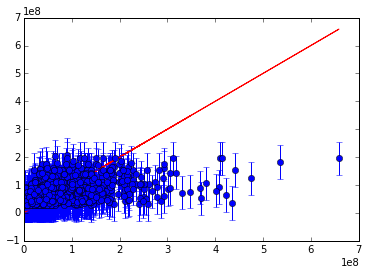

In [52]:
m = makemodel(mojo_df, 'domestic_gross', ['production_budget'])

plt.plot(mojo_df.domestic_gross, mojo_df.domestic_gross, 'r-')
#plt.plot(mojo_df.domestic_gross, m.predict(), 'bo', alpha=.3)
plt.errorbar(mojo_df.domestic_gross, m.predict(), yerr=np.sqrt(m.mse_resid), fmt='bo')


### Viz. #3

Continue from previous challenge. Calculate the mean standard error of your model. To each of your prediction points, add an errorbar the size of the mean square error.

In [53]:
mse = (mojo_df.domestic_gross - m.predict())**2/(len(mojo_df)-2) # degrees freedom thing
print m.mse_resid
print mse.sum()
print np.allclose(m.mse_resid, mse.sum())

3.57652889143e+15
3.57652889143e+15
True


<Container object of 3 artists>

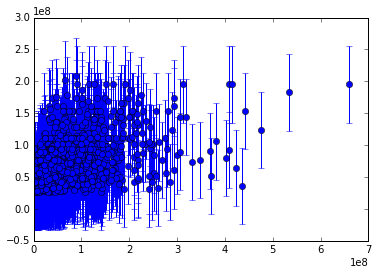

In [54]:
plt.errorbar(mojo_df.domestic_gross, m.predict(), yerr=np.sqrt(m.mse_resid), fmt='o')

### Viz. #4

Try drawing the 95% confidence intervals, using `wls_prediction_std` from statsmodels. This page has an example to get you started.

In [55]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

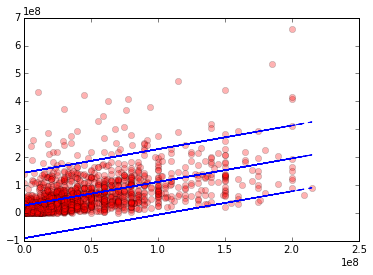

In [56]:
m = makemodel(mojo_df, 'domestic_gross', ['production_budget'])

plt.plot(mojo_df.production_budget, mojo_df.domestic_gross, 'ro', alpha=.3)
plt.plot(mojo_df.production_budget, m.predict(), 'b-')

prstd, lower, upper = wls_prediction_std(m)

plt.plot(mojo_df.production_budget, lower, 'b--')
plt.plot(mojo_df.production_budget, upper, 'b--')

#plt.fill_between(mojo_df.production_budget, lower, upper, color='blue', alpha=.3)

See also: 
  * http://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html
  * http://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html#aesthetics-tutorial